# Pymaceuticals Inc.
---

### Analysis

- The first piece of analysis that you can take away from this Tumor study is that the two medicines Capomulin & Ramicane were the two best at reducing tumors in the mice.  I would recommend further study of the two treatments to see which of the two overall is the best to go with.  While Capomulin at first seems the best Ramicane just needs to be further tested to confirm this.

- You will also see that as the mice weight goes up the size of the tumor increases as well.

- The pie charts show that the sex of the mice didn't have any real effect on the treatments and that is noticed due to the fact that the size of the tumors didn't increase or decrease in any major difference depending on the sex of the mice.

- Lastly you will notice that Infubinol & Ceftamin are the two worst of the 4 medicines(Capomulin, Ramicane, Infubinol, & Ceftamin) are reducing the tumor volume.  I would suggest not using Infubinol & Ceftamin anymore as a treatment regimen any further and move more of the mice to Capomulin and Ramicane as that will be more beneficial at reducing the tumor volume.




 

In [330]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib import pyplot as plt


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineddf = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])


# Display the data table for preview
combineddf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [331]:
# Checking the number of mice.
micenumber = combineddf['Mouse ID'].nunique()
print (f'The number of mice is: {micenumber}')

The number of mice is: 249


In [332]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combineddf.loc[combineddf.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [333]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemouseid = combineddf.loc[combineddf['Mouse ID'] == 'g989']
duplicatemouseid                           

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [334]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedup = cleanedup[~cleanedup.isin(duplicatemouseid)].dropna()
cleanedup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0.0,45.000000,0.0
1,k403,Ramicane,Male,21.0,16.0,5.0,38.825898,0.0
2,k403,Ramicane,Male,21.0,16.0,10.0,35.014271,1.0
3,k403,Ramicane,Male,21.0,16.0,15.0,34.223992,1.0
4,k403,Ramicane,Male,21.0,16.0,20.0,32.997729,1.0
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9.0,30.0,25.0,63.145652,2.0
1889,z969,Naftisol,Male,9.0,30.0,30.0,65.841013,3.0
1890,z969,Naftisol,Male,9.0,30.0,35.0,69.176246,4.0
1891,z969,Naftisol,Male,9.0,30.0,40.0,70.314904,4.0


In [335]:
# Checking the number of mice in the clean DataFrame.
cleanedupmicenumber = cleanedup['Mouse ID'].nunique()
print (f'The number of mice is the cleaned up DataFrame is: {cleanedupmicenumber}')


The number of mice is the cleaned up DataFrame is: 248


## Summary Statistics

In [336]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleanedup['Tumor Volume (mm3)'].groupby(cleanedup['Drug Regimen']).mean()
median = cleanedup['Tumor Volume (mm3)'].groupby(cleanedup['Drug Regimen']).median()
variance = cleanedup['Tumor Volume (mm3)'].groupby(cleanedup['Drug Regimen']).var()
stddev = cleanedup['Tumor Volume (mm3)'].groupby(cleanedup['Drug Regimen']).std()
sem = cleanedup['Tumor Volume (mm3)'].groupby(cleanedup['Drug Regimen']).sem()
print (f'The Mean is:\n{mean}')
print (f'\nThe Median is:\n{median}.')
print (f'\nThe Variance is:\n{variance}.')
print (f'\nThe Standard Deviation is:\n{stddev}.')
print (f'\nThe SEM is:\n{sem}.')
summarydf = pd.DataFrame ({"Tumor Volume Mean": mean, "Tumor Volume Median": median, "Tumor Volume Variance": variance, "Tumor Volume Std Deviation": stddev, "Tumor Volume SEM": sem})
summarydf

The Mean is:
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

The Median is:
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64.

The Variance is:
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64.

The Standard Deviation is:
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [337]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
singled = cleanedup.groupby(["Drug Regimen"])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
singled

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

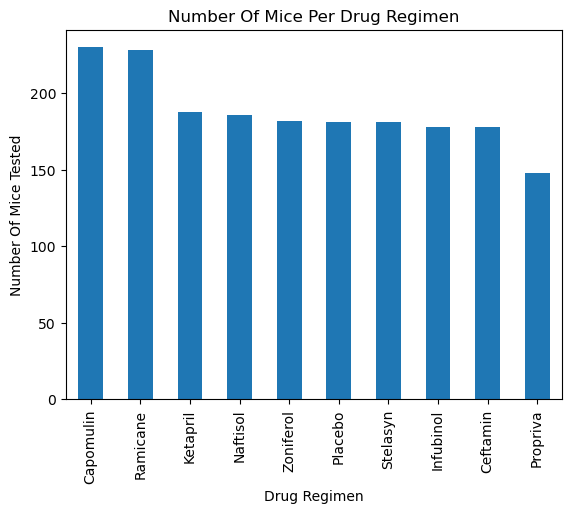

In [338]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_pandas = cleanedup["Drug Regimen"].value_counts().plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Mice Tested")
plt.title("Number Of Mice Per Drug Regimen")
plt.show()

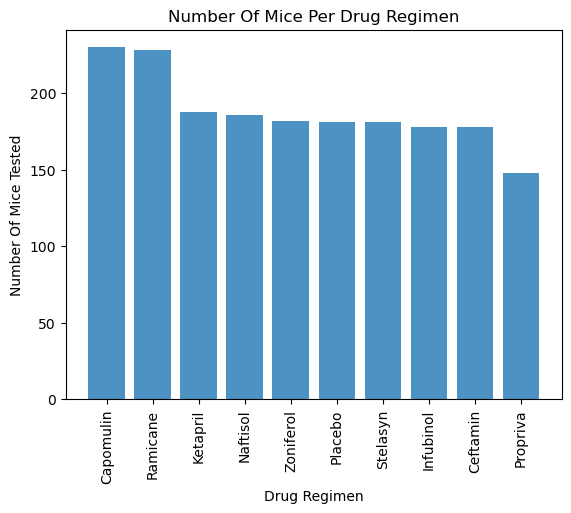

In [339]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis, y_axis, alpha=0.8, align='center')
x_axis = cleanedup["Drug Regimen"].value_counts().index.values
y_axis = cleanedup["Drug Regimen"].value_counts().values
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Mice Tested")
plt.title("Number Of Mice Per Drug Regimen")
plt.show()

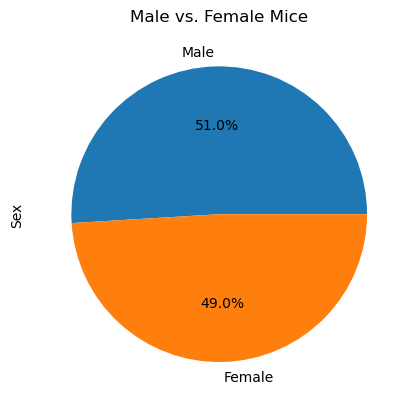

In [340]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleanedup["Sex"].value_counts().plot.pie(autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.title("Male vs. Female Mice")
plt.show()

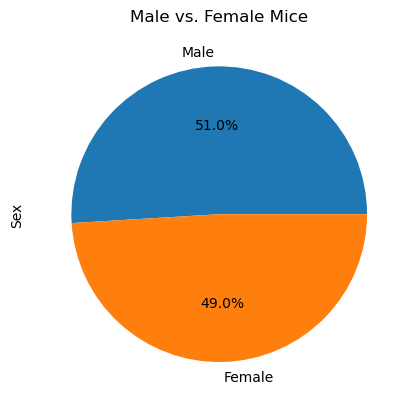

In [341]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
cleanedup["Sex"].value_counts().plot.pie(y='Total Count', autopct= "%1.1f%%")
Labels = ['Male', 'Female']
plt.ylabel("Sex")
plt.title("Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [342]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin = cleanedup.loc[cleanedup["Drug Regimen"] == "Capomulin"]
Ramicane = cleanedup.loc[cleanedup["Drug Regimen"] == "Ramicane"]
Infubinol = cleanedup.loc[cleanedup["Drug Regimen"] == "Infubinol"]
Ceftamin = cleanedup.loc[cleanedup["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
Capomulinb = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulinbest = pd.DataFrame(Capomulinb)
Ramicaneb = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicanebest = pd.DataFrame(Ramicaneb)
Infubinolb = Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinolbest = pd.DataFrame(Infubinolb)
Ceftaminb = Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftaminbest = pd.DataFrame(Ceftaminb)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulinoverall = pd.merge(Capomulinbest, cleanedup, how="left", on=["Mouse ID", "Timepoint"])
Ramicaneoverall = pd.merge(Ramicanebest, cleanedup, how="left", on=["Mouse ID", "Timepoint"])
Infubinoloverall = pd.merge(Infubinolbest, cleanedup, how="left", on=["Mouse ID", "Timepoint"])
Ceftaminoverall = pd.merge(Ceftaminbest, cleanedup, how="left", on=["Mouse ID", "Timepoint"])


print(f'Here is the Capomulin Tumor Volume At Last Timepoint')
Capomulinoverall

Here is the Capomulin Tumor Volume At Last Timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45.0,Capomulin,Female,9.0,22.0,38.982878,2.0
1,b742,45.0,Capomulin,Male,7.0,21.0,38.939633,0.0
2,f966,20.0,Capomulin,Male,16.0,17.0,30.485985,0.0
3,g288,45.0,Capomulin,Male,3.0,19.0,37.074024,1.0
4,g316,45.0,Capomulin,Female,22.0,22.0,40.159220,2.0
5,i557,45.0,Capomulin,Female,1.0,24.0,47.685963,1.0
6,i738,45.0,Capomulin,Female,23.0,20.0,37.311846,2.0
7,j119,45.0,Capomulin,Female,7.0,23.0,38.125164,1.0
8,j246,35.0,Capomulin,Female,21.0,21.0,38.753265,1.0
9,l509,45.0,Capomulin,Male,17.0,21.0,41.483008,3.0


In [343]:
print(f'Here is the Ramicane Tumor Volume At Last Timepoint')
Ramicaneoverall

Here is the Ramicane Tumor Volume At Last Timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45.0,Ramicane,Male,3.0,22.0,38.407618,1.0
1,a444,45.0,Ramicane,Female,10.0,25.0,43.047543,0.0
2,a520,45.0,Ramicane,Male,13.0,21.0,38.810366,1.0
3,a644,45.0,Ramicane,Female,7.0,17.0,32.978522,1.0
4,c458,30.0,Ramicane,Female,23.0,20.0,38.342008,2.0
5,c758,45.0,Ramicane,Male,9.0,17.0,33.397653,1.0
6,d251,45.0,Ramicane,Female,8.0,19.0,37.311236,2.0
7,e662,45.0,Ramicane,Male,8.0,24.0,40.659006,2.0
8,g791,45.0,Ramicane,Male,11.0,16.0,29.128472,1.0
9,i177,45.0,Ramicane,Male,10.0,18.0,33.562402,3.0


In [344]:
print(f'Here is the Infubinol Tumor Volume At Last Timepoint')
Infubinoloverall

Here is the Infubinol Tumor Volume At Last Timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45.0,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45.0,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a577,30.0,Infubinol,Female,6.0,25.0,57.031862,2.0
3,a685,45.0,Infubinol,Male,8.0,30.0,66.083066,3.0
4,c139,45.0,Infubinol,Male,11.0,28.0,72.226731,2.0
5,c326,5.0,Infubinol,Female,18.0,25.0,36.321346,0.0
6,c895,30.0,Infubinol,Female,7.0,29.0,60.969711,2.0
7,e476,45.0,Infubinol,Male,23.0,26.0,62.435404,1.0
8,f345,45.0,Infubinol,Male,23.0,26.0,60.918767,1.0
9,i386,40.0,Infubinol,Female,23.0,29.0,67.289621,4.0


In [345]:
print(f'Here is the Ceftamin Tumor Volume At Last Timepoint')
Ceftaminoverall

Here is the Ceftamin Tumor Volume At Last Timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45.0,Ceftamin,Female,20.0,28.0,62.999356,3.0
1,b447,0.0,Ceftamin,Male,2.0,30.0,45.000000,0.0
2,b487,25.0,Ceftamin,Female,6.0,28.0,56.057749,1.0
3,b759,30.0,Ceftamin,Female,12.0,25.0,55.742829,1.0
4,f436,15.0,Ceftamin,Female,3.0,25.0,48.722078,2.0
5,h531,5.0,Ceftamin,Male,5.0,27.0,47.784682,0.0
6,j296,45.0,Ceftamin,Female,24.0,30.0,61.849023,3.0
7,k210,45.0,Ceftamin,Male,15.0,28.0,68.923185,3.0
8,l471,45.0,Ceftamin,Female,7.0,28.0,67.748662,1.0
9,l490,30.0,Ceftamin,Male,24.0,26.0,57.918381,3.0


In [346]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
Capomulinoverall1 = Capomulinoverall["Tumor Volume (mm3)"]
capomuliniqr1, capomuliniqr2 = np.percentile(Capomulinoverall1, [75 ,25])
print (f' The upper quartile is: {capomuliniqr1} & The lower quartile is: {capomuliniqr2}')
capomuliniqr = capomuliniqr1 - capomuliniqr2
print (f' The IQR for Capomulin is: {capomuliniqr}')
print (f' The possible outliers would be any below: {capomuliniqr2 - (1.5*capomuliniqr)} & any above: {capomuliniqr1 - (1.5*capomuliniqr)}')

 The upper quartile is: 40.1592203 & The lower quartile is: 32.37735684
 The IQR for Capomulin is: 7.781863460000004
 The possible outliers would be any below: 20.70456164999999 & any above: 28.486425109999995


In [347]:
Ramicaneoverall1 = Ramicaneoverall["Tumor Volume (mm3)"]
Ramicaneiqr1, Ramicaneiqr2 = np.percentile(Ramicaneoverall1, [75 ,25])
print (f' The upper quartile is: {Ramicaneiqr1} & The lower quartile is: {Ramicaneiqr2}')
Ramicaneiqr = Ramicaneiqr1 - Ramicaneiqr2
print (f' The IQR for Ramicane is: {Ramicaneiqr}')
print (f' The possible outliers would be any below: {Ramicaneiqr2 - (1.5*Ramicaneiqr)} & any above: {Ramicaneiqr1 - (1.5*Ramicaneiqr)}')

 The upper quartile is: 40.65900627 & The lower quartile is: 31.56046955
 The IQR for Ramicane is: 9.098536719999998
 The possible outliers would be any below: 17.912664470000003 & any above: 27.01120119


In [348]:
Infubinoloverall1 = Infubinoloverall["Tumor Volume (mm3)"]
Infubinoliqr1, Infubinoliqr2 = np.percentile(Infubinoloverall1, [75 ,25])
print (f' The upper quartile is: {Infubinoliqr1} & The lower quartile is: {Infubinoliqr2}')
Infubinoliqr = Infubinoliqr1 - Infubinoliqr2
print (f' The IQR for Infubinol is: {Infubinoliqr}')
print (f' The possible outliers would be any below: {Infubinoliqr2 - (1.5*Infubinoliqr)} & any above: {Infubinoliqr1 - (1.5*Infubinoliqr)}')

 The upper quartile is: 65.52574285 & The lower quartile is: 54.04860769
 The IQR for Infubinol is: 11.477135160000003
 The possible outliers would be any below: 36.83290494999999 & any above: 48.310040109999996


In [349]:
Ceftaminoverall1 = Ceftaminoverall["Tumor Volume (mm3)"]
Ceftaminiqr1, Ceftaminiqr2 = np.percentile(Ceftaminoverall1, [75 ,25])
print (f' The upper quartile is: {Ceftaminiqr1} & The lower quartile is: {Ceftaminiqr2}')
Ceftaminiqr = Ceftaminiqr1 - Ceftaminiqr2
print (f' The IQR for Ceftamin is: {Ceftaminiqr}')
print (f' The possible outliers would be any below: {Ceftaminiqr2 - (1.5*Ceftaminiqr)} & any above: {Ceftaminiqr1 - (1.5*Ceftaminiqr)}')

 The upper quartile is: 64.29983003 & The lower quartile is: 48.72207785
 The IQR for Ceftamin is: 15.577752179999997
 The possible outliers would be any below: 25.355449580000002 & any above: 40.93320176


In [397]:
timepoint = cleanedup.groupby("Mouse ID")
timepoint = timepoint["Timepoint"].max()
timepoint1 = pd.DataFrame(timepoint)

tumorvolume = pd.merge(timepoint1, cleanedup, on = ["Mouse ID","Timepoint"])
tumorvolume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45.0,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45.0,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a262,45.0,Placebo,Female,17.0,29.0,70.717621,4.0
3,a275,45.0,Ceftamin,Female,20.0,28.0,62.999356,3.0
4,a366,30.0,Stelasyn,Female,16.0,29.0,63.440686,1.0
...,...,...,...,...,...,...,...,...
243,z435,10.0,Propriva,Female,12.0,26.0,48.710661,0.0
244,z578,45.0,Ramicane,Male,11.0,16.0,30.638696,0.0
245,z581,45.0,Infubinol,Female,24.0,25.0,62.754451,3.0
246,z795,45.0,Naftisol,Female,13.0,29.0,65.741070,3.0


In [398]:
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combineddf[combineddf["Drug Regimen"].isin(drug)]
drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [351]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumorvolcap = []
tumorvolram = []
tumorvolinf = []
tumorvolcef = []

for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumorvolcap.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumorvolram.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumorvolinf.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumorvolcef.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])

# Put four tumor vol lists into a list for for loop
tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'***************')
    print(f'\n{treatments[i]}:'')
    print(f'The lower quartile of tumor volume is: {lowerq}.')
    print(f'The upper quartile of tumor volume is: {upperq}.')
    print(f'The interquartile range of tumor volume is: {iqr}.')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Values below {lower_bound} could be outliers.')
    print(f'Values above {upper_bound} could be outliers.')
    print("")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    

***************

Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

***************

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

***************

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

***************

Ceftamin:
The lower quartile of tumor volume is: 48.72207785.
The upper quartile of tumor volume is: 64.299

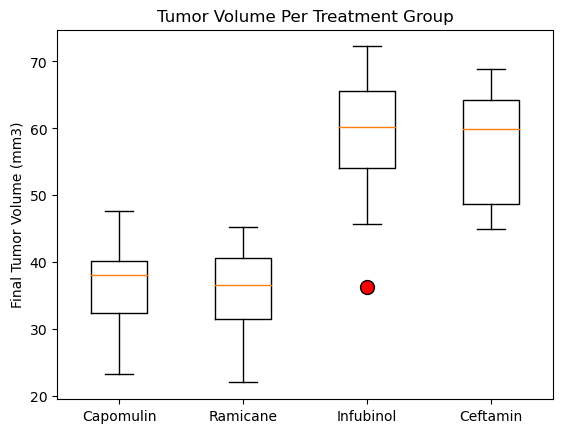

In [352]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
circle = dict(markerfacecolor = "r" , marker = "o", markersize = 10)
fig1, axis1 = plt.subplots()
axis1.set_ylabel('Final Tumor Volume (mm3)'')
axis1.boxplot(tumor_vol, flierprops = circle)
axis1.set_title('Tumor Volume Per Treatment Group', fontsize = 12)
axis1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

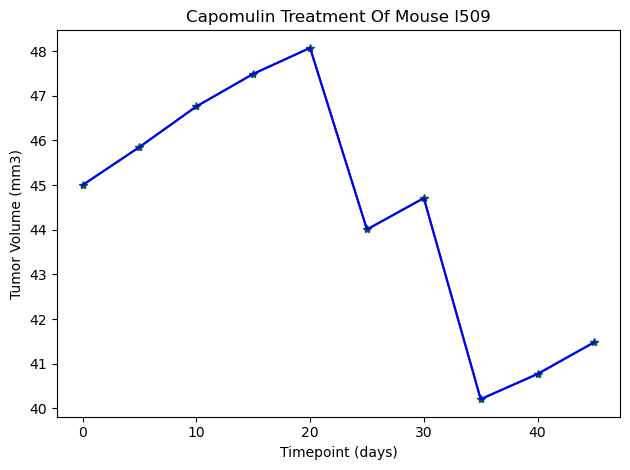

In [387]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot = Capomulin.loc[Capomulin['Mouse ID'] == "l509"]
lineplot.head()

timevol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"],  color = "blue")                    
plt.title('Capomulin Treatment Of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

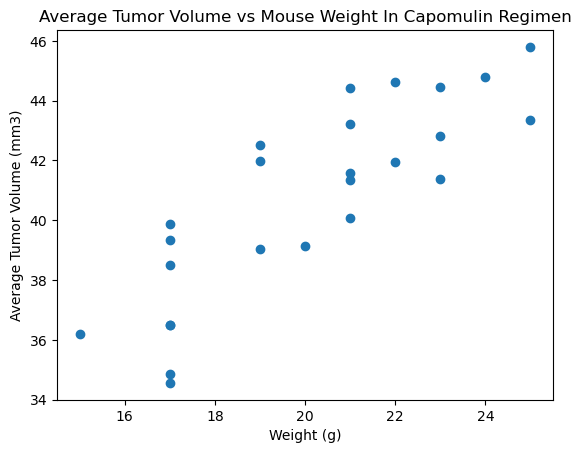

In [388]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


scatterplot = Capomulin.loc[Capomulin['Mouse ID'] == "l509"]

avgweight = Capomulin.groupby(['Mouse ID']).mean()['Weight (g)']
avgtumor = Capomulin.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

plt.scatter(avgweight, avgtumor)

plt.title('Average Tumor Volume vs Mouse Weight In Capomulin Regimen')
plt.xlabel('Weight (g)'')
plt.ylabel('Average Tumor Volume (mm3)'')

plt.show()


## Correlation and Regression

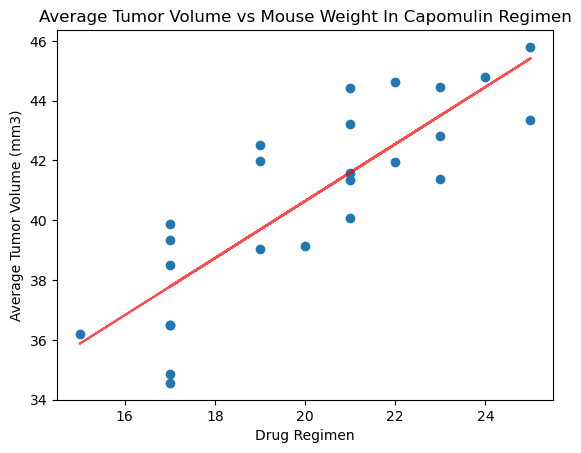

The correlation coefficient is: 0.84


In [396]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = avgweight
y = avgtumor

correlation = round(st.pearsonr(x_values, y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, color='r', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('Average Tumor Volume (mm3)'')
plt.title('Average Tumor Volume vs Mouse Weight In Capomulin Regimen')
plt.show()

print(f'The correlation coefficient is: {correlation}'')
